In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import statsmodels.formula.api as smf

/Users/juliasbardelatti/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df_desmatamento = pd.read_csv("../2.dados/PRODES/desmatamento_municipal/base_desmatamento_por_municipio_e_ano.csv")

In [3]:
df_malaria = pd.read_csv("../2.dados/malaria/dados_malaria.csv")

In [4]:
df_merged = pd.merge(df_malaria, df_desmatamento, on=['codigo_municipio', 'ano', 'uf'], how='outer')
df_merged = df_merged[['codigo_municipio', 'municipio', 'ano', 'valor', 'uf', 'area_desmatada']]
df_merged.columns = ['codigo_municipio', 'nome_municipio', 'ano', 'quantidade_casos', 'uf', 'area_desmatada_km2']

In [5]:
df_merged = df_merged.sort_values(by=["codigo_municipio", "ano"])
df_merged["desmatamento_ano_anterior"] = df_merged.groupby("codigo_municipio")["area_desmatada_km2"].shift(1)
df_merged = df_merged.query("ano > 2014")

In [10]:
df_merged

,codigo_municipio,nome_municipio,ano,quantidade_casos,uf,area_desmatada_km2,desmatamento_ano_anterior
1,1100015,Alta Floresta D'Oeste,2015,30.0,Rondônia,5.06,10.30
2,1100015,Alta Floresta D'Oeste,2016,6.0,Rondônia,15.57,5.06
3,1100015,Alta Floresta D'Oeste,2017,2.0,Rondônia,19.30,15.57
4,1100015,Alta Floresta D'Oeste,2018,2.0,Rondônia,13.80,19.30
5,1100015,Alta Floresta D'Oeste,2019,2.0,Rondônia,30.01,13.80
...,...,...,...,...,...,...,...
8004,5108956,Nova Monte Verde,2019,0.0,Mato Grosso,40.03,16.81
8005,5108956,Nova Monte Verde,2020,0.0,Mato Grosso,18.89,40.03
8006,5108956,Nova Monte Verde,2021,0.0,Mato Grosso,26.11,18.89
8007,5108956,Nova Monte Verde,2022,0.0,Mato Grosso,34.26,26.11


In [15]:
df_merged['desmatamento_ano_anterior'] = df_merged['desmatamento_ano_anterior'].fillna(0)
df_merged['quantidade_casos'] = df_merged['quantidade_casos'].fillna(0)

In [ ]:
#df_model = df_merged_2.dropna(subset=["desmatamento_ano_anterior"])
df_model = df_merged.reset_index(drop=True)
modelo_uf = smf.mixedlm(
    "quantidade_casos ~ desmatamento_ano_anterior",
    df_model,
    groups=df_model["uf"]
)
resultado = modelo_uf.fit()
print(resultado.summary())


                  Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    quantidade_casos
No. Observations:      7236       Method:                REML            
No. Groups:            9          Scale:                 783110.9106     
Min. group size:       135        Log-Likelihood:        -59383.8076     
Max. group size:       1872       Converged:             Yes             
Mean group size:       804.0                                             
-------------------------------------------------------------------------
                            Coef.    Std.Err.   z    P>|z| [0.025  0.975]
-------------------------------------------------------------------------
Intercept                    415.288  162.149  2.561 0.010 97.482 733.093
desmatamento_ano_anterior      2.818    0.255 11.065 0.000  2.319   3.318
Group Var                 234236.942  134.157                            



<Figure size 1200x600 with 0 Axes>

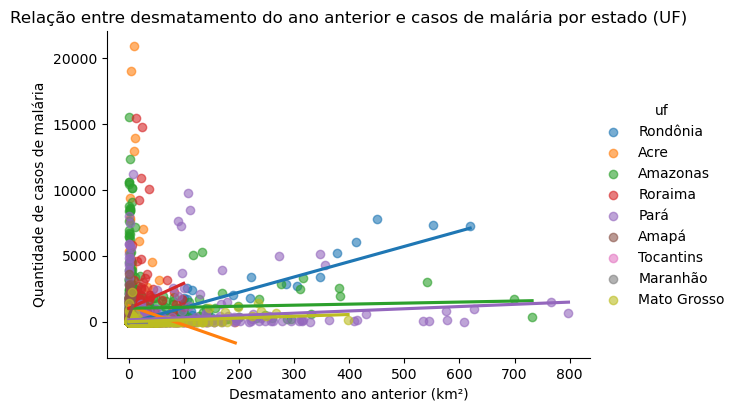

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lmplot(
    data=df_model,
    x="desmatamento_ano_anterior",
    y="quantidade_casos",
    hue="uf",
    height=4,
    aspect=1.5,
    markers="o",
    ci=None, 
    scatter_kws={"alpha":0.6}
)

plt.title("Relação entre desmatamento do ano anterior e casos de malária por estado (UF)")
plt.xlabel("Desmatamento ano anterior (km²)")
plt.ylabel("Quantidade de casos de malária")
plt.show()


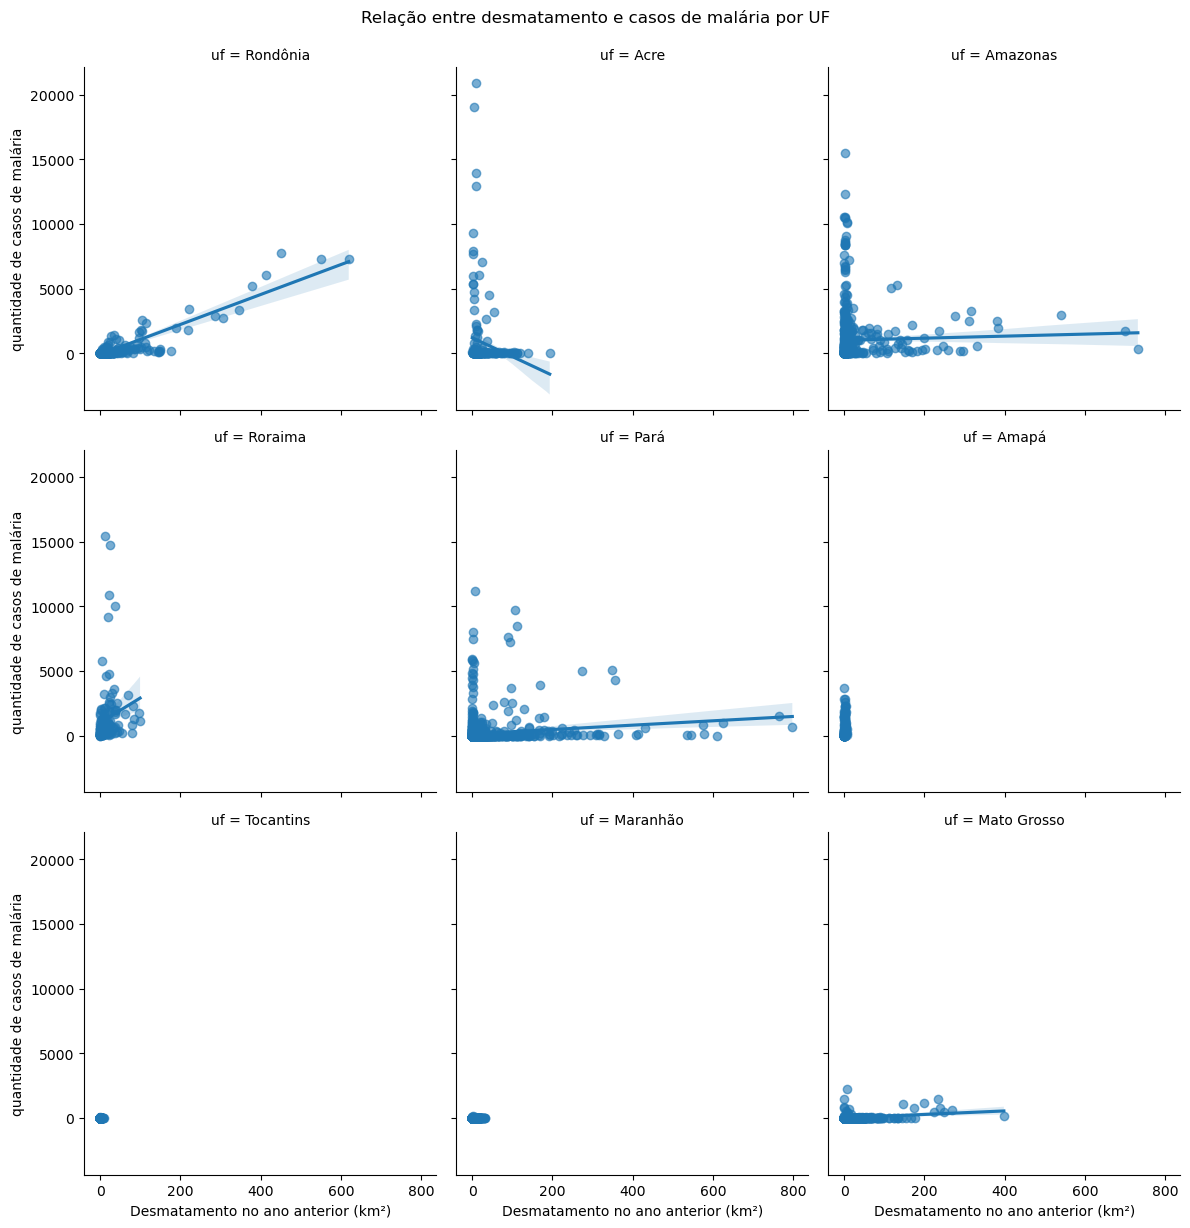

In [ ]:
g = sns.lmplot(
    data=df_model, 
    x='desmatamento_ano_anterior', 
    y='quantidade_casos', 
    col='uf', 
    col_wrap=3,    
    height=4, 
    scatter_kws={'alpha':0.6}
)
g.set_axis_labels("Desmatamento no ano anterior (km²)", "quantidade de casos de malária")
g.fig.suptitle("Relação entre desmatamento e casos de malária por UF", y=1.02)
plt.show()

/Users/juliasbardelatti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/juliasbardelatti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/juliasbardelatti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/juliasbardelatti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

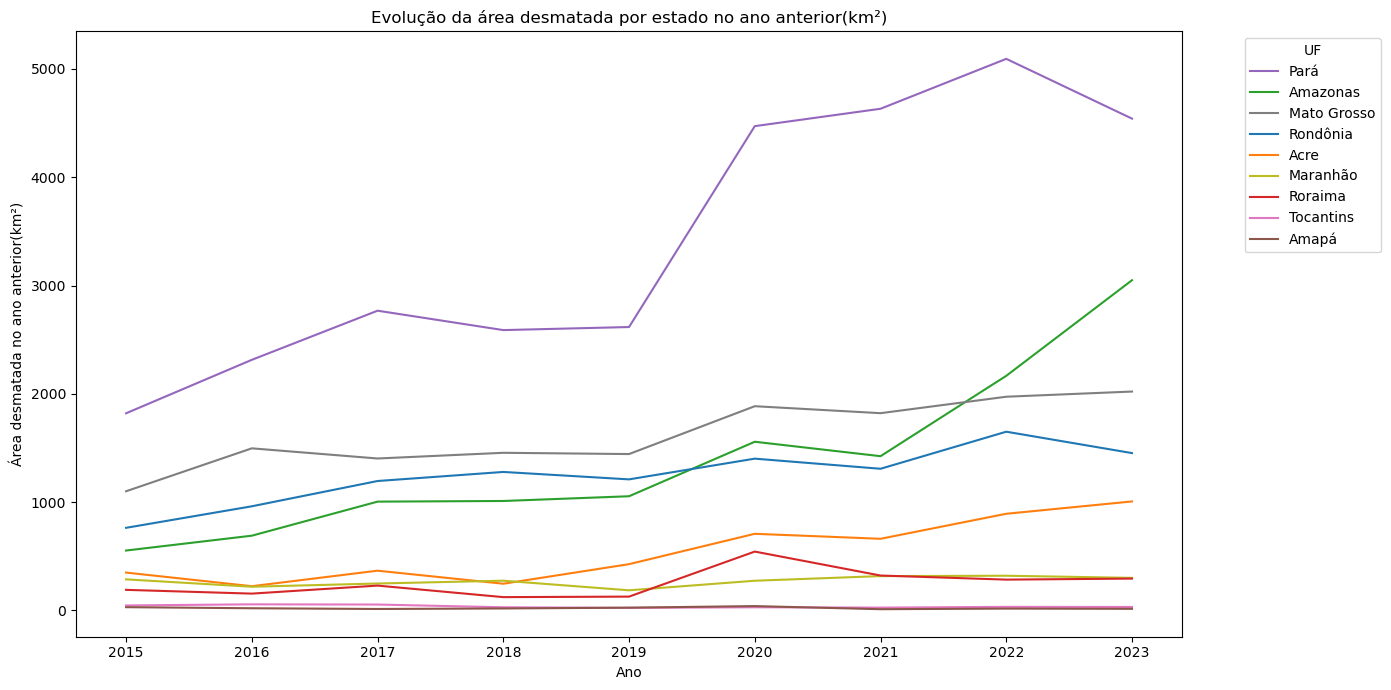

In [ ]:
df_uf_desmatamento = df_model.groupby(['uf', 'ano'])['desmatamento_ano_anterior'].sum().reset_index()
ultimo_ano = df_uf_desmatamento['ano'].max()

ordem_legenda = (
    df_uf_desmatamento[df_uf_desmatamento['ano'] == ultimo_ano]
    .sort_values(by='desmatamento_ano_anterior', ascending=False)['uf']
    .tolist()
)

cores_personalizadas = {
    'Rondônia': '#1f77b4',
    'Acre': '#ff7f0e',
    'Amazonas': '#2ca02c',
    'Roraima': '#d62728',
    'Pará': '#9467bd',
    'Amapá': '#8c564b',
    'Tocantins': '#e377c2',
    'Mato Grosso': '#7f7f7f',
    'Maranhão': '#bcbd22'
}

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_uf_desmatamento,
    x='ano',
    y='desmatamento_ano_anterior',
    hue='uf',
    palette=cores_personalizadas,
    hue_order=ordem_legenda
)

plt.title('Evolução da área desmatada por estado no ano anterior(km²)')
plt.xlabel('Ano')
plt.ylabel('Área desmatada no ano anterior(km²)')
plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/Users/juliasbardelatti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/juliasbardelatti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/juliasbardelatti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/juliasbardelatti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: Future

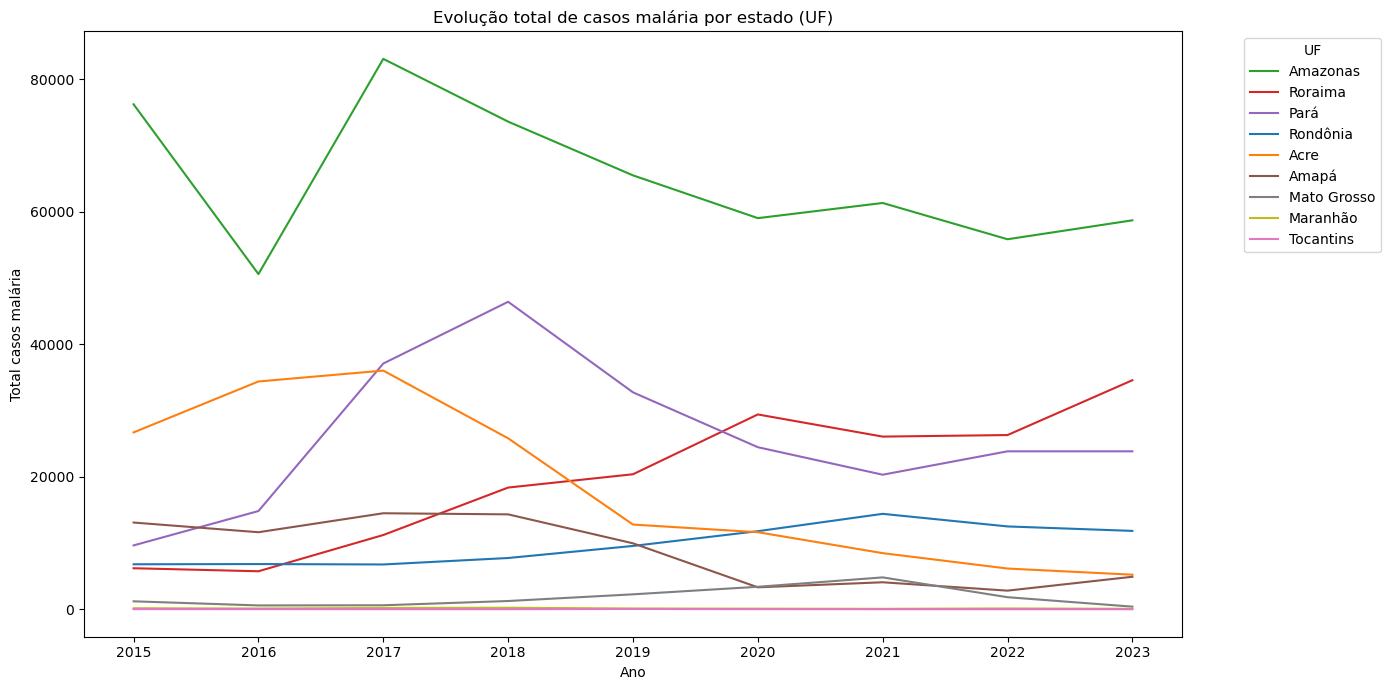

In [ ]:
df_uf_desmatamento = df_model.groupby(['uf', 'ano'])['quantidade_casos'].sum().reset_index()
ultimo_ano = df_uf_desmatamento['ano'].max()

ordem_legenda = (
    df_uf_desmatamento[df_uf_desmatamento['ano'] == ultimo_ano]
    .sort_values(by='quantidade_casos', ascending=False)['uf']
    .tolist()
)

cores_personalizadas = {
    'Rondônia': '#1f77b4',
    'Acre': '#ff7f0e',
    'Amazonas': '#2ca02c',
    'Roraima': '#d62728',
    'Pará': '#9467bd',
    'Amapá': '#8c564b',
    'Tocantins': '#e377c2',
    'Mato Grosso': '#7f7f7f',
    'Maranhão': '#bcbd22'
}

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_uf_desmatamento,
    x='ano',
    y='quantidade_casos',
    hue='uf',
    palette=cores_personalizadas,
    hue_order=ordem_legenda
)

plt.title('Evolução total de casos malária por estado (UF)')
plt.xlabel('Ano')
plt.ylabel('Total casos malária')
plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [19]:
df_merged = pd.merge(df_malaria, df_desmatamento, on=['codigo_municipio', 'ano', 'uf'], how='outer')
df_merged = df_merged[['codigo_municipio', 'municipio', 'ano', 'valor', 'uf', 'area_desmatada']]
df_merged.columns = ['codigo_municipio', 'nome_municipio', 'ano', 'quantidade_casos', 'uf', 'area_desmatada_km2']
df_merged = df_merged.sort_values(by=["codigo_municipio", "ano"])

In [ ]:
df_2 = df_merged.copy()

resultados = []

for lag in range(1, 6):
    df_2[f'desmatamento_lag{lag}'] = df_2.groupby('codigo_municipio')['area_desmatada_km2'].shift(lag)
    df_2_modelo = df_2.dropna(subset=[f'desmatamento_lag{lag}'])
    
    modelo = smf.mixedlm(
        f"quantidade_casos ~ desmatamento_lag{lag}",
        df_2_modelo,
        groups=df_2_modelo["uf"]
    )
    resultado = modelo.fit()
    
    res_dict = {
        'lag': lag,
        'coef_intercept': resultado.params['Intercept'],
        'coef_lag': resultado.params[f'desmatamento_lag{lag}'],
        'pval_intercept': resultado.pvalues['Intercept'],
        'pval_lag': resultado.pvalues[f'desmatamento_lag{lag}'],
        'std_err_intercept': resultado.bse['Intercept'],
        'std_err_lag': resultado.bse[f'desmatamento_lag{lag}']
    }
    resultados.append(res_dict)

df_resultados = pd.DataFrame(resultados)

print(df_resultados)


In [822]:
df_resultados

,lag,coef_intercept,coef_lag,pval_intercept,pval_lag,std_err_intercept,std_err_lag
0,1,417.391677,2.777054,0.012487,2.192586e-25,167.086129,0.266724
1,2,421.146942,3.165521,0.017879,5.339393e-25,177.840550,0.306539
2,3,403.530852,3.647465,0.030152,1.441215e-26,186.123062,0.341916
3,4,378.159970,4.376985,0.051379,1.573506e-29,194.097393,0.387892
4,5,370.713957,5.397968,0.072297,1.634872e-26,206.268034,0.506566


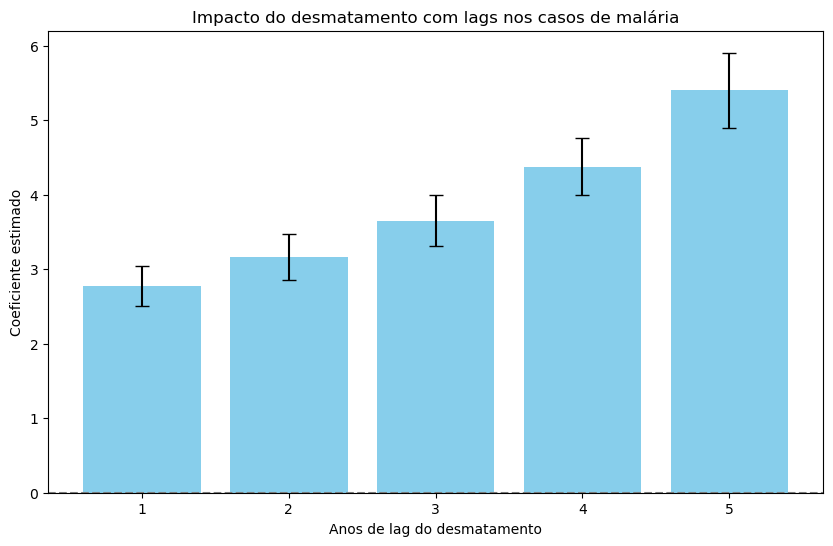

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(df_resultados['lag'], df_resultados['coef_lag'], yerr=df_resultados['std_err_lag'], capsize=5, color='skyblue')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Anos de lag do desmatamento')
plt.ylabel('Coeficiente estimado')
plt.title('Impacto do desmatamento com lags nos casos de malária')
plt.xticks(df_resultados['lag'])
plt.show()
